In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = 'https://raw.githubusercontent.com/connor-bennett/Proejct-Two/refs/heads/main/kickstarter-projects/ks-projects-201801.csv'
df = pd.read_csv(input_file)
print(df.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In [3]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
# Check how many missing values are in each column
print(df.isna().sum())

# For 'name', decide how to handle missing values
df['name'] = df['name'].fillna('Unknown')  # Replace missing names with 'Unknown'

# For 'usd pledged', fill missing values with 0 (assuming no pledges for these rows)
df['usd pledged'] = df['usd pledged'].fillna(0)

# Verify that there are no more missing values
print(df.isna().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


In [5]:
# Convert 'deadline' and 'launched' to datetime if not already
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

# Verify the data types
print(df.dtypes)


ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object


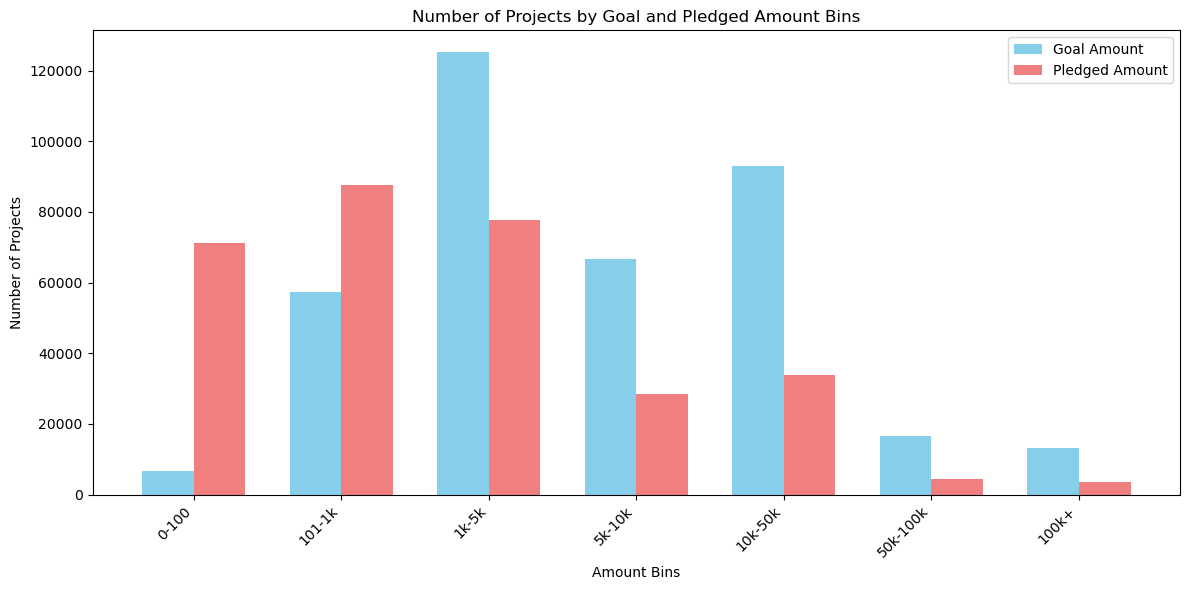

In [45]:
# Count the values for goal and pledged bins
goal_counts = df['goal_bins'].value_counts(sort=False)
pledged_counts = df['pledged_bins'].value_counts(sort=False)

# Create a combined bar plot
x = np.arange(len(goal_counts))  # the label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))

# Plot goal bins
plt.bar(x - width/2, goal_counts, width, label='Goal Amount', color='skyblue')

# Plot pledged bins
plt.bar(x + width/2, pledged_counts, width, label='Pledged Amount', color='lightcoral')

# Add labels, title, and legend
plt.title("Number of Projects by Goal and Pledged Amount Bins")
plt.xlabel("Amount Bins")
plt.ylabel("Number of Projects")
plt.xticks(x, labels=goal_counts.index, rotation=45, ha='right')  # Set x-tick labels and rotate
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

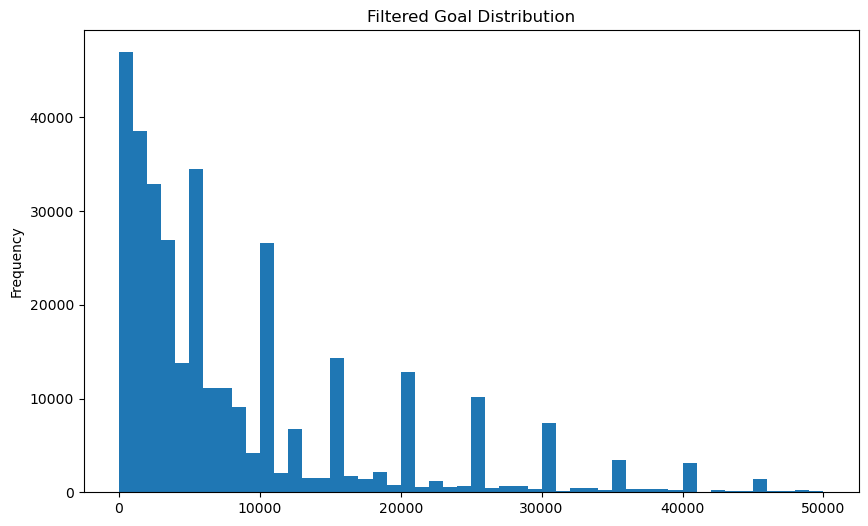

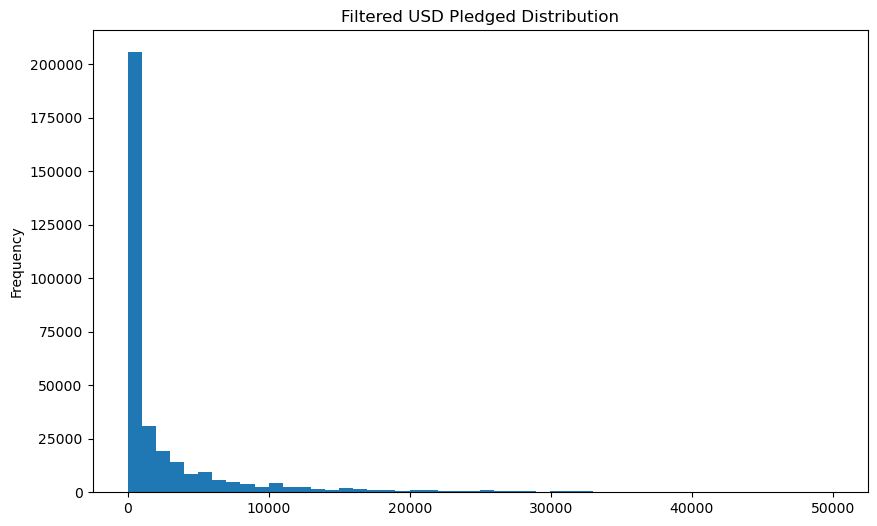

In [21]:
# Filter for projects with realistic goals and pledged amounts
filtered_df = df[(df['goal'] < 50000) & (df['usd pledged'] < 50000)]

# Plot histograms for filtered data
filtered_df['goal'].plot(kind='hist', bins=50, title='Filtered Goal Distribution', figsize=(10, 6))
plt.show()

filtered_df['usd pledged'].plot(kind='hist', bins=50, title='Filtered USD Pledged Distribution', figsize=(10, 6))
plt.show()

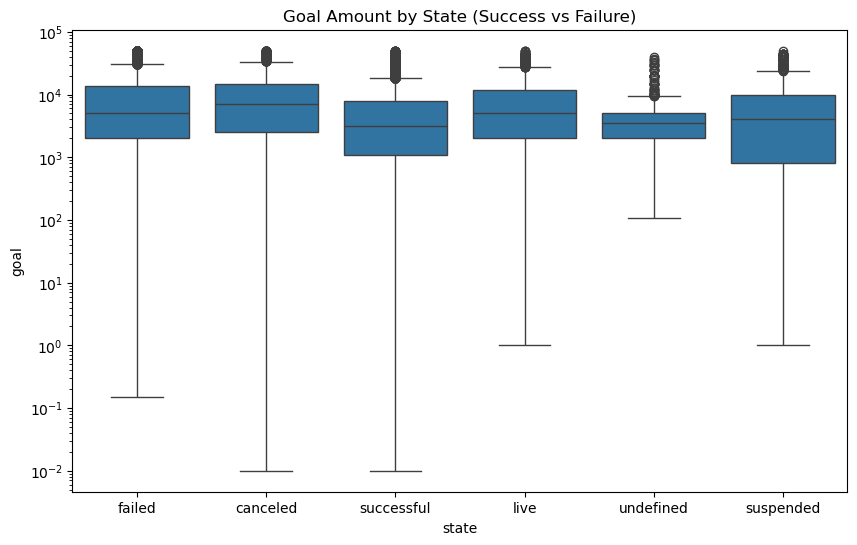

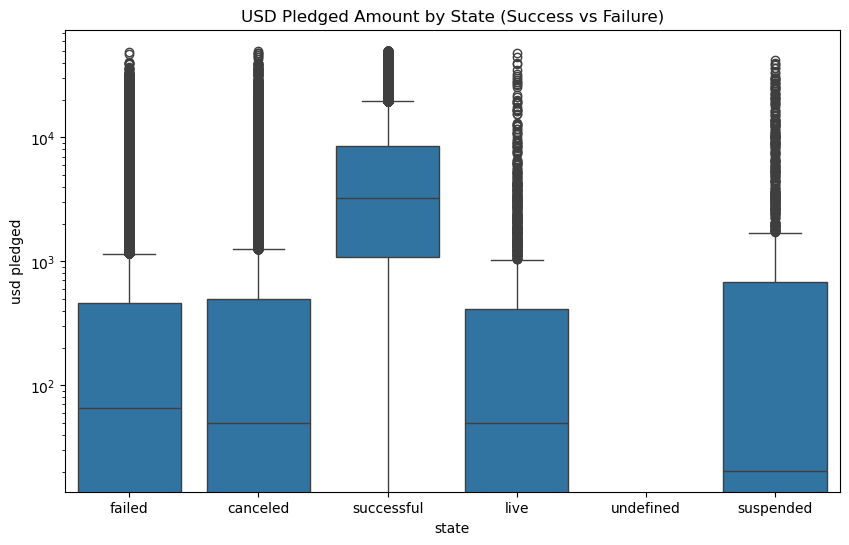

In [23]:
# Compare distributions by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='goal', data=filtered_df)
plt.yscale('log')  # Optional: Use log scale if needed
plt.title("Goal Amount by State (Success vs Failure)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='usd pledged', data=filtered_df)
plt.yscale('log')  # Optional: Use log scale if needed
plt.title("USD Pledged Amount by State (Success vs Failure)")
plt.show()

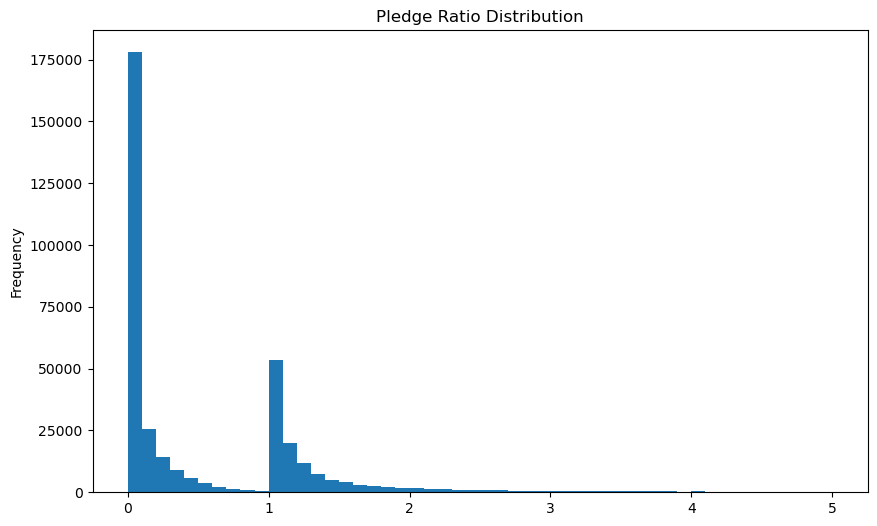

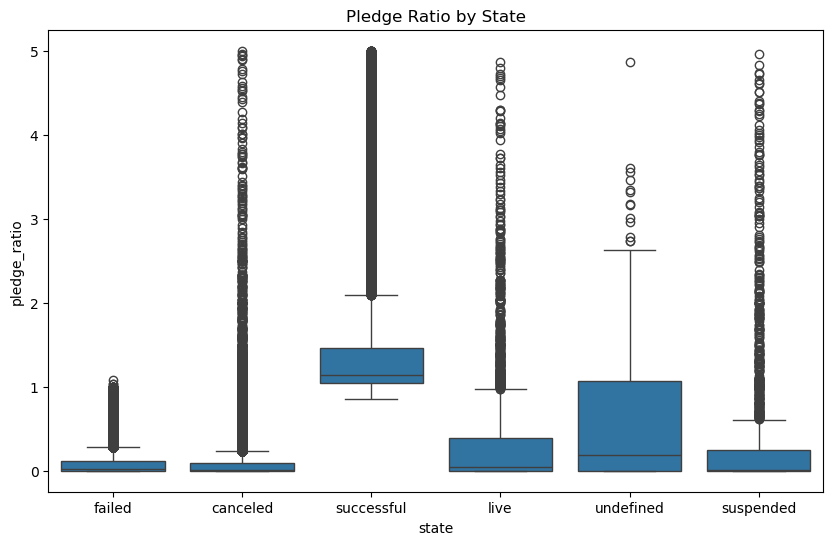

In [25]:
# Calculate pledge ratio
df['pledge_ratio'] = df['usd_pledged_real'] / df['usd_goal_real']

# Filter unrealistic values (e.g., very large ratios)
filtered_df = df[(df['pledge_ratio'] < 5)]

# Plot histogram of pledge ratios
filtered_df['pledge_ratio'].plot(kind='hist', bins=50, title='Pledge Ratio Distribution', figsize=(10, 6))
plt.show()

# Boxplot of pledge ratio by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='pledge_ratio', data=filtered_df)
plt.title("Pledge Ratio by State")
plt.show()

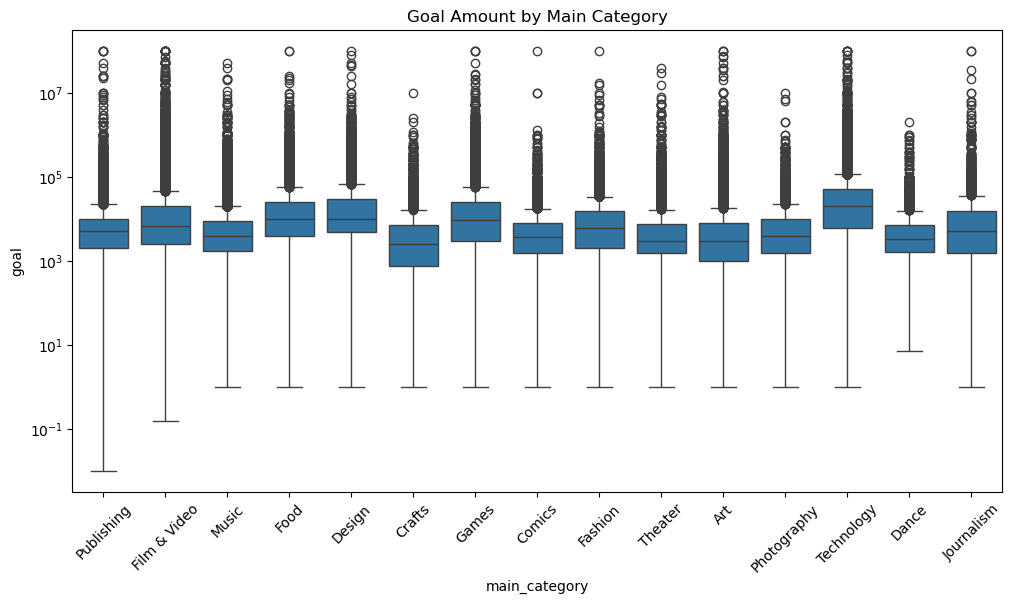

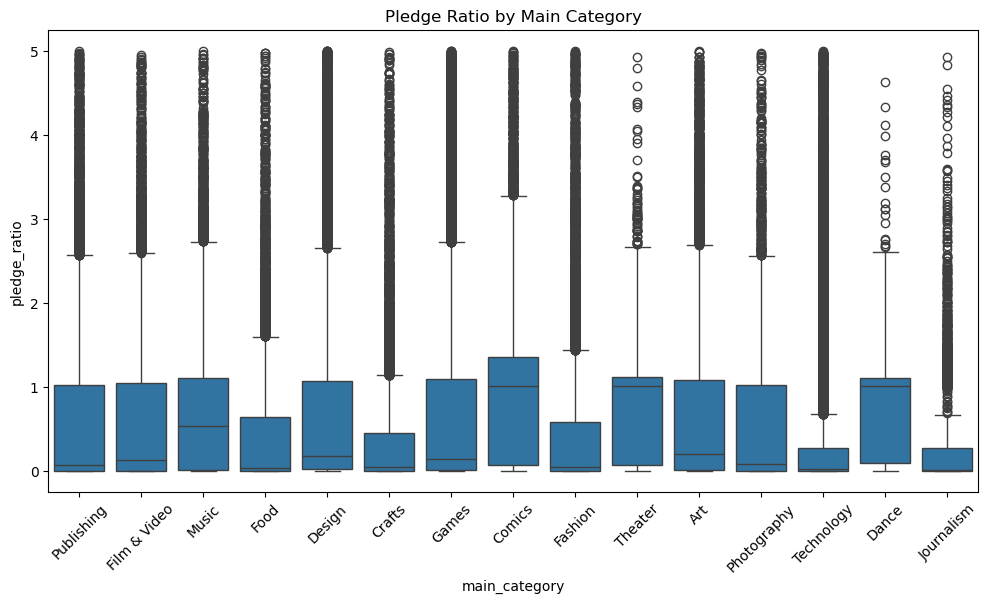

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='goal', data=filtered_df)
plt.yscale('log')  # Optional
plt.title("Goal Amount by Main Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='pledge_ratio', data=filtered_df)
plt.title("Pledge Ratio by Main Category")
plt.xticks(rotation=45)
plt.show()